## This notebook deals with the Sentiment Analysis of Tweets posted during 2019 Canadian Elections. We will build several models to check which one works best and try answering the question - "What can public opinion on Twitter tell us about the Canadian political landscape in 2019?"

## The notebook can be broadly divided into following sections:

### a) Data Cleaning
### b) Exploratory Data Analysis
### c) Model Preparation
### d) Model Implementation
### e) Results

#### We will begin with initilializing the libraries and feeding the dataset

## Importing Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## For Cleaning and Decoding
import re
import html
import unicodedata
import string

## For Preparing Features to Model
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


## For Bonus Section
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

## For Data Exploration
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

## For building models    
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import svm

from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB

## For evaluating models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anmol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creating DataSets -> tweets_df (containing general tweets) and canadian_elections_2019_df (containing tweets on Canadian Elections 2019)

In [3]:
## Loading Datasets
tweets_df=pd.read_csv('generic_tweets.txt')
canadian_elections_2019_df = pd.read_csv('Canadian_elections_2019.csv', encoding='utf-8')


## Loading stopwords to filter words while cleaning the tweets
stop_words = open('stop_words.txt','r').read()

## Taking a look at the general tweets
tweets_df

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
canadian_elections_2019_df   ## Taking a look at the Canadian Election tweets

## Note: the tweets (i.e. text column) are in bytes format

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ..."
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h..."
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d..."
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don..."
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh..."


#### Creating a copy of the datasets to make changes into and preserving the original datasets

In [5]:
tw_df_copy=tweets_df.copy()
can_ele_2019_copy=canadian_elections_2019_df.copy()

## Part A : Data Cleaning

### 1. Dropping unwanted columns

**As we can see that the columns - [id, date, query, user] will not be participating in the modeling, we will drop these columns from our dataset**

In [6]:
tw_df_copy=tw_df_copy.drop(['id','date','query','user'],axis=1)
tw_df_copy

,class,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


### 2. Cleaning the tweets (Part 1)

**Steps Involved:**
1. All text in lowercase
2. Removal of URL links and twitter handles
3. Removal of HTML attributes such as </>
4. Parsing of HTML character codes into their ASCII equivalent

In [7]:
def Clean_Gen(tweet):
    
    '''Function to clean General Tweets dataset'''
    
    tweet_comb = []
    
    word = tweet.lower()  # converting text into lowercase

    word = re.sub(r'http\S+', '', word)  # removing URL Links
    word = re.sub(r'www.\S+', '', word)

    word = re.sub(r'@\S+', '', word)  # removing twitter handles

    comp = re.compile(r'<\n>?]')
    word = re.sub(comp, '', word)  # removing HTML attributes

    word = html.unescape(word)  # converting HTML character codes into their ASCII Equivalent

    tweet_comb.append(word)
    
    return str(tweet_comb)

In [8]:
def Clean_Can(tweet):
    
    '''Function to clean General Tweets dataset'''
    
    tweet_comb=[]
    
    ## As Elections tweets are in bytes format, decoding the same in utf-8 format 
    tweet = eval(tweet).decode("utf-8", "ignore")

    word = tweet.lower()  # converting text into lowercase

    word = re.sub(r'http\S+', '', word)  # removing URL Links
    word = re.sub(r'www.\S+', '', word)

    word = word.replace('\n', '')  # removing '\n' from tweets

    comp = re.compile(r'<\>.]/+^-')
    word = re.sub(comp, '', word)  # removing HTML attributes

    word = html.unescape(word)  # converting HTML character codes into their ASCII Equivalent

    tweet_comb.append(word)
    
    return str(tweet_comb)

In [9]:
## Applying the respective functions on respective tweets of the datasets

tw_df_copy['text_clean'] = tw_df_copy['text'].apply(lambda x: Clean_Gen(x))

can_ele_2019_copy['text_clean'] = can_ele_2019_copy['text'].apply(lambda x: Clean_Can(x))

In [10]:
tw_df_copy  # Observe the change from original tweet to cleaned tweet

,class,text,text_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","["" - awww, that's a bummer. you shoulda got ..."
1,0,is upset that he can't update his Facebook by ...,"[""is upset that he can't update his facebook b..."
2,0,@Kenichan I dived many times for the ball. Man...,[' i dived many times for the ball. managed to...
3,0,my whole body feels itchy and like its on fire,['my whole body feels itchy and like its on fi...
4,0,"@nationwideclass no, it's not behaving at all....","["" no, it's not behaving at all. i'm mad. why ..."
5,0,@Kwesidei not the whole crew,[' not the whole crew ']
6,0,Need a hug,['need a hug ']
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,"["" hey long time no see! yes.. rains a bit ,o..."
8,0,@Tatiana_K nope they didn't have it,"["" nope they didn't have it ""]"
9,0,@twittera que me muera ?,[' que me muera ? ']


In [11]:
can_ele_2019_copy  # Observe the change from original tweet to cleaned tweet

,sentiment,negative_reason,text,text_clean
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[""@rosiebarton so instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","[""#allwomanspacewalk it's real!@space_station ..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[""#brantford it's going to cost you $94 billio..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","[""#canada #canadaelection2019 #canadavotes #el..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[""#canada #taxpayers are sick & tired of havin..."
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","[""#canadavotes2019 #elxn43 #cdnpoli - facts - ..."
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","[""#cdnmedia #elxn43 #cdnpoli #ppc rocky dong h..."
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","[""#cdnpoli #elxn43 the liberals ++ more than d..."
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","[""#chooseforward #cdnpoli #elxn43canada, don't..."
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","[""#cpckinsellagatelet's see the receipts. who ..."


### 3. Cleaning the tweets (Part 2)

**Steps Involved:**
1. Tokenize the tweets
2. Filter out stopwords
3. Use SnowballStemmer to stem the remaininig words

**Token: Each “entity” that is a part of whatever was split up based on rules. For examples, each word is a token when a sentence is “tokenized” into words. Each sentence can also be a token, if you tokenized the sentences out of a paragraph.**

Source: https://www.geeksforgeeks.org/tokenize-text-using-nltk-python/

**Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). We would not want these words taking up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to be stop words**

Source: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

**Stemming: is the process of reducing words to their core root (for instance - cooking to cook, asked to ask).**
**As there can be understemming or overstemming of words, this process can affect the model. However, to reduce the processing time, we will perform stemming.**
**We use SnowballStemmer instead of PorterStemmer as it is a better stemmer and universally accepted.**

Source: https://towardsdatascience.com/stemming-lemmatization-what-ba782b7c0bd8

In [12]:
## Cleaning General Tweets below

s1 = ' '
corpus_clean_gen = []

for line in tw_df_copy['text_clean']: 

    tokenizer = RegexpTokenizer(r'\w+') # Intializing Tokenizer based on white spaces rule     

    b = tokenizer.tokenize(line)
    words_rmStop = [word for word in b if word not in stopwords.words('english')] # removing stop words
    words_rmStop = [word for word in b if word not in stop_words]

    sb = SnowballStemmer(language='english')
    words_stem = [sb.stem(word) for word in words_rmStop] # stemming the tweets

    corpus_clean_gen.append(s1.join(words_stem))

In [13]:
## Cleaning Election Tweets below

s1 = ' '
corpus_clean_ele = []

for line in can_ele_2019_copy['text_clean']: 

    tokenizer = RegexpTokenizer(r'\w+') # Intializing Tokenizer based on white spaces rule        

    b = tokenizer.tokenize(line)
    words_rmStop = [word for word in b if word not in stopwords.words('english')] # removing stop words
    words_rmStop = [word for word in b if word not in stop_words]

    sb = SnowballStemmer(language='english')
    words_stem = [sb.stem(word) for word in words_rmStop] # stemming the tweets

    corpus_clean_ele.append(s1.join(words_stem))

In [14]:
## Appending the cleaned tweet into the datasets

tw_df_copy['text_clean_tokenized']=corpus_clean_gen
can_ele_2019_copy['text_clean_tokenized']=corpus_clean_ele

In [15]:
can_ele_2019_copy

,sentiment,negative_reason,text,text_clean,text_clean_tokenized
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[""@rosiebarton so instead of your suggestion, ...",rosiebarton suggest agre canadian women trust ...
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","[""#allwomanspacewalk it's real!@space_station ...",allwomanspacewalk space_st etobicokenorth city...
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[""#brantford it's going to cost you $94 billio...",brantford go cost 94 billion 4 year justin elx...
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","[""#canada #canadaelection2019 #canadavotes #el...",canada canadaelection2019 canadavot elxn43 dec...
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[""#canada #taxpayers are sick & tired of havin...",canada taxpay sick tire earn donat corpor welf...
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","[""#canadavotes2019 #elxn43 #cdnpoli - facts - ...",canadavotes2019 elxn43 cdnpoli fact blastfromt...
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","[""#cdnmedia #elxn43 #cdnpoli #ppc rocky dong h...",cdnmedia elxn43 cdnpoli ppc rocki dong hand be...
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","[""#cdnpoli #elxn43 the liberals ++ more than d...",cdnpoli elxn43 liber doubl promis 2015 nation ...
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","[""#chooseforward #cdnpoli #elxn43canada, don't...",chooseforward cdnpoli elxn43canada america mis...
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","[""#cpckinsellagatelet's see the receipts. who ...",cpckinsellagatelet receipt pay warren kinsella...


## Part B: Exploration of Data (Exploratory Data Analysis)

**Now that the data has been cleaned, we will move forward with the exploration of data**

### 1. Assigning the political party (Liberal/Conservative/NDP) to a given tweet

In [16]:
## Creating a column to designate the political party

can_ele_2019_copy['political_party'] = '0'
can_ele_2019_copy

,sentiment,negative_reason,text,text_clean,text_clean_tokenized,political_party
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[""@rosiebarton so instead of your suggestion, ...",rosiebarton suggest agre canadian women trust ...,0
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","[""#allwomanspacewalk it's real!@space_station ...",allwomanspacewalk space_st etobicokenorth city...,0
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[""#brantford it's going to cost you $94 billio...",brantford go cost 94 billion 4 year justin elx...,0
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","[""#canada #canadaelection2019 #canadavotes #el...",canada canadaelection2019 canadavot elxn43 dec...,0
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[""#canada #taxpayers are sick & tired of havin...",canada taxpay sick tire earn donat corpor welf...,0
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","[""#canadavotes2019 #elxn43 #cdnpoli - facts - ...",canadavotes2019 elxn43 cdnpoli fact blastfromt...,0
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","[""#cdnmedia #elxn43 #cdnpoli #ppc rocky dong h...",cdnmedia elxn43 cdnpoli ppc rocki dong hand be...,0
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","[""#cdnpoli #elxn43 the liberals ++ more than d...",cdnpoli elxn43 liber doubl promis 2015 nation ...,0
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","[""#chooseforward #cdnpoli #elxn43canada, don't...",chooseforward cdnpoli elxn43canada america mis...,0
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","[""#cpckinsellagatelet's see the receipts. who ...",cpckinsellagatelet receipt pay warren kinsella...,0


**Concept**

We will look for certain keywords in a tweet to classify the tweet with a political party.

1. Liberal : Keywords - 'justin|trudeau|justintrudeau|liberal|lpc'
2. Conservative : Keywords - 'andrew|scheer|andrewscheer|conservative|cpc'
3. NDP : Keywords - 'thejagmeetsingh|ndp|jagmeet|singh|democratic'

**Process**

1. To look if a tweet contains keywords from two or more parties; classify the tweet as 'Mixed'
2. To look if the tweets contain keywords only from a particular party; classify them accordingly
3. If none of the keywords are found; classify it as 'None'

In [17]:
for i in range(len(can_ele_2019_copy['text_clean'])):
    
    if ((pd.Series(can_ele_2019_copy['text_clean'][i]).str.contains('justin|trudeau|justintrudeau|liberal|lpc')[0]) & (pd.Series(can_ele_2019_copy['text_clean'][i]).str.contains('andrew|scheer|andrewscheer|conservative|cpc')[0])) | ((pd.Series(can_ele_2019_copy['text_clean'][i]).str.contains('justin|trudeau|justintrudeau|liberal|lpc')[0]) & (pd.Series(can_ele_2019_copy['text_clean'][i]).str.contains('thejagmeetsingh|ndp|jagmeet|singh|democratic')[0])) | ((pd.Series(can_ele_2019_copy['text_clean'][i]).str.contains('andrew|scheer|andrewscheer|conservative|cpc')[0]) & (pd.Series(can_ele_2019_copy['text_clean'][i]).str.contains('thejagmeetsingh|ndp|jagmeet|singh|democratic')[0])):
        can_ele_2019_copy['political_party'][i] = 'Mixed'
    
    elif (pd.Series(can_ele_2019_copy['text_clean'][i]).str.contains('justin|trudeau|justintrudeau|liberal|lpc')[0]):
        can_ele_2019_copy['political_party'][i] = 'Liberal'
        
    elif (pd.Series(can_ele_2019_copy['text_clean'][i]).str.contains('andrew|scheer|andrewscheer|conservative|cpc')[0]):
        can_ele_2019_copy['political_party'][i] = 'Conservative'
                    
    elif (pd.Series(can_ele_2019_copy['text_clean'][i]).str.contains('thejagmeetsingh|ndp|jagmeet|singh|democratic')[0]):
        can_ele_2019_copy['political_party'][i] = 'NDP'  
        
    else:
        can_ele_2019_copy['political_party'][i] = 'None'  

In [18]:
can_ele_2019_copy

,sentiment,negative_reason,text,text_clean,text_clean_tokenized,political_party
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[""@rosiebarton so instead of your suggestion, ...",rosiebarton suggest agre canadian women trust ...,Conservative
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","[""#allwomanspacewalk it's real!@space_station ...",allwomanspacewalk space_st etobicokenorth city...,None
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[""#brantford it's going to cost you $94 billio...",brantford go cost 94 billion 4 year justin elx...,Liberal
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","[""#canada #canadaelection2019 #canadavotes #el...",canada canadaelection2019 canadavot elxn43 dec...,None
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[""#canada #taxpayers are sick & tired of havin...",canada taxpay sick tire earn donat corpor welf...,Liberal
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","[""#canadavotes2019 #elxn43 #cdnpoli - facts - ...",canadavotes2019 elxn43 cdnpoli fact blastfromt...,Conservative
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","[""#cdnmedia #elxn43 #cdnpoli #ppc rocky dong h...",cdnmedia elxn43 cdnpoli ppc rocki dong hand be...,None
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","[""#cdnpoli #elxn43 the liberals ++ more than d...",cdnpoli elxn43 liber doubl promis 2015 nation ...,Mixed
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","[""#chooseforward #cdnpoli #elxn43canada, don't...",chooseforward cdnpoli elxn43canada america mis...,None
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","[""#cpckinsellagatelet's see the receipts. who ...",cpckinsellagatelet receipt pay warren kinsella...,Mixed


### Let's explore the distribution of tweets based on political parties

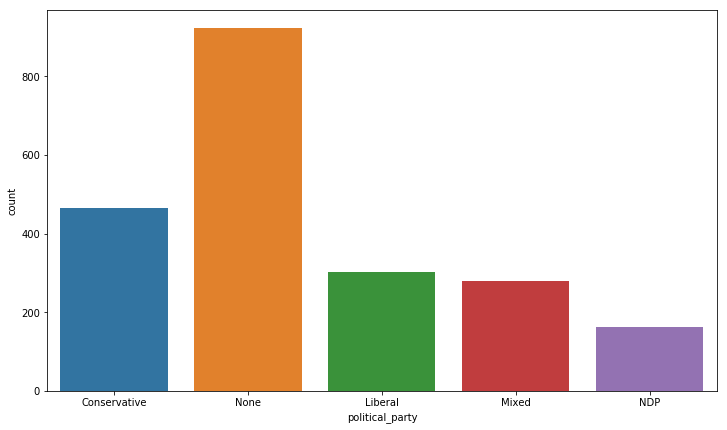

In [19]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=can_ele_2019_copy)

In [20]:
can_ele_2019_copy.groupby('political_party')['political_party'].count()

political_party
Conservative    466
Liberal         303
Mixed           280
NDP             162
None            922
Name: political_party, dtype: int64

**We can infer that most of the tweets are unclassified, then further on we have most count for conservative, liberal and NDP**

In [21]:
mixed_pos = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='positive') & (can_ele_2019_copy['political_party']=='Mixed')]['political_party'].count()
mixed_neg = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='negative') & (can_ele_2019_copy['political_party']=='Mixed')]['political_party'].count()

none_pos = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='positive') & (can_ele_2019_copy['political_party']=='None')]['political_party'].count()
none_neg = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='negative') & (can_ele_2019_copy['political_party']=='None')]['political_party'].count()

lpc_pos = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='positive') & (can_ele_2019_copy['political_party']=='Liberal')]['political_party'].count()
lpc_neg = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='negative') & (can_ele_2019_copy['political_party']=='Liberal')]['political_party'].count()

cpc_pos = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='positive') & (can_ele_2019_copy['political_party']=='Conservative')]['political_party'].count()
cpc_neg = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='negative') & (can_ele_2019_copy['political_party']=='Conservative')]['political_party'].count()

ndp_pos = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='positive') & (can_ele_2019_copy['political_party']=='NDP')]['political_party'].count()
ndp_neg = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='negative') & (can_ele_2019_copy['political_party']=='NDP')]['political_party'].count()

total_neg = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='negative')]['political_party'].count()
total_pos = can_ele_2019_copy[(can_ele_2019_copy['sentiment']=='positive')]['political_party'].count()

In [22]:
print ("% of Positive tweets for Each party out of the their respective total tweets:")
print ("Liberal: %0.2f, Conservative: %0.2f, NDP: %0.2f" % ((lpc_pos/(lpc_pos+lpc_neg)), (cpc_pos/(cpc_pos+cpc_neg)), (ndp_pos/(ndp_pos+ndp_neg))))

print ("\n% of Negative tweets for Each party out of the their respective total tweets:")
print ("Liberal: %0.2f, Conservative: %0.2f, NDP: %0.2f" % ((lpc_neg/(lpc_pos+lpc_neg)), (cpc_neg/(cpc_pos+cpc_neg)), (ndp_neg/(ndp_pos+ndp_neg))))

print ("\nRatio of Pos-vs-Neg in Mixed Tweets: %0.2f" % (mixed_pos/mixed_neg))

% of Positive tweets for Each party out of the their respective total tweets:
Liberal: 0.47, Conservative: 0.30, NDP: 0.71

% of Negative tweets for Each party out of the their respective total tweets:
Liberal: 0.53, Conservative: 0.70, NDP: 0.29

Ratio of Pos-vs-Neg in Mixed Tweets: 0.76


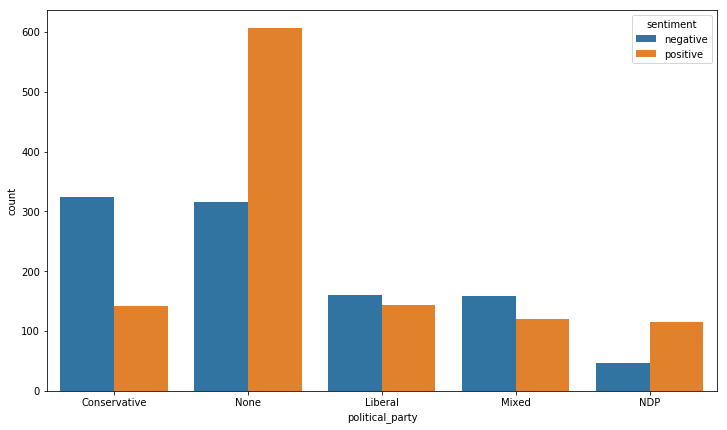

In [23]:
## Further distributing based on negative and positive sentiments

plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=can_ele_2019_copy, hue='sentiment')

Some Inferences:
    
 - Greater Proportion of the sentiment is positive for unclassified tweets
 - Conservative party has the most negative tweets
 - NDP party has the best positive to negative tweet ratio
 - Liberal party has almost equal number of negative and positive tweets
 
### Let's plot wordclouds to find out which words are dominant in the cleaned dataset

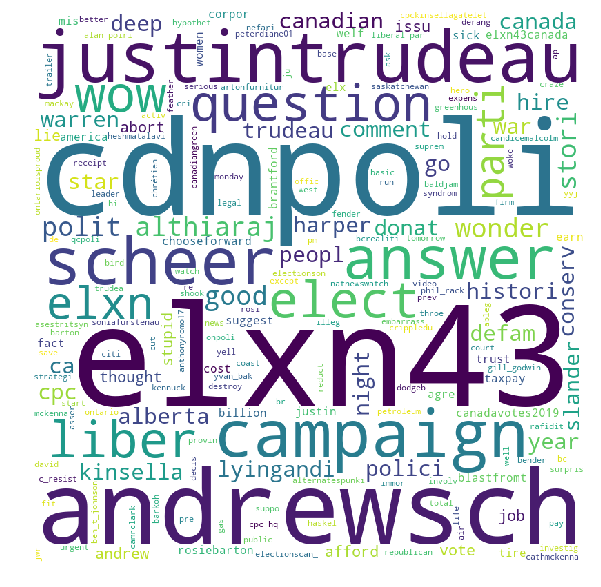

In [24]:
## WordCloud for NEGATIVE tweets in Elections Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(can_ele_2019_copy[can_ele_2019_copy['sentiment']=='negative']['text_clean_tokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Words such as 'andrewsch', 'justintrudeau' appear most frequently in NEGATIVE tweets in Elections Dataset**

**This could suggest that most of the public's negativity is directed towards the two major political parties since these two parties (Conservative, Liberal) have been in power the most in Canada**

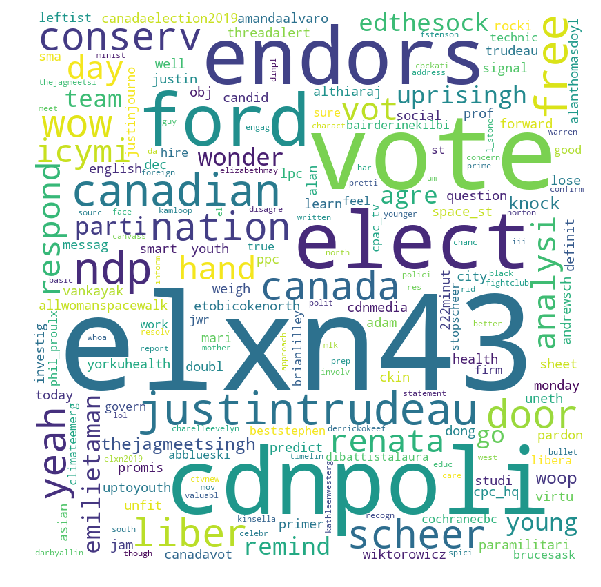

In [25]:
## WordCloud for POSITIVE tweets in Elections Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(can_ele_2019_copy[can_ele_2019_copy['sentiment']=='positive']['text_clean_tokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Apart from the generic election words such as 'elect', 'vote', etc. we find words such as 'conserv', 'ford', 'justintrudeau' appearing most prominently in POSITIVE tweets in Elections Dataset**

**There seems to be a stronger positive sentiment appearing towards the Liberal party as 'ford' and 'justintrudeau' is found in the majority of the positive tweets**

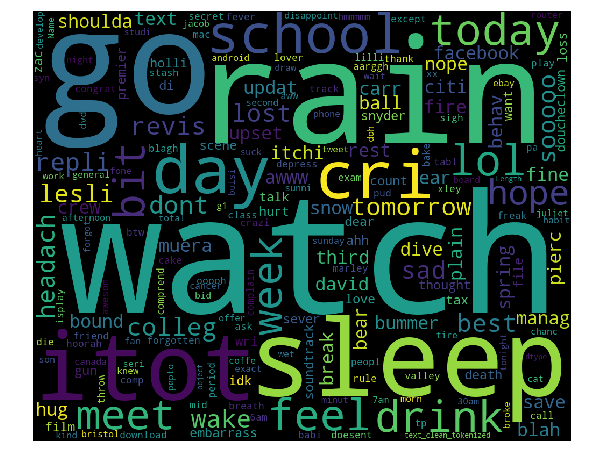

In [26]:
## WordCloud for NEGATIVE tweets in General Dataset

wordcloud = WordCloud(width = 1000, height = 800, background_color ='black', min_font_size = 10).generate(str(tw_df_copy[tw_df_copy['class']==0]['text_clean_tokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Words such as 'watch', 'rain' appear most in NEGATIVE tweets in General Dataset. We don't see many nouns/pronouns appearing in the wordcloud. Most Verbs have been associated as Negative words and they are dominant in the negative tweets**

**The word 'go' is found prominently in negative tweets here**

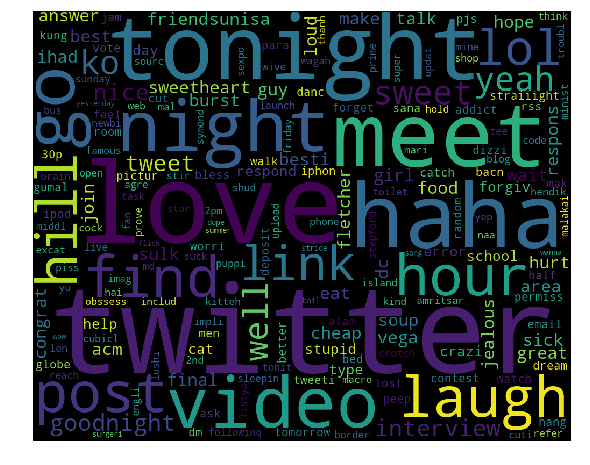

In [27]:
## WordCloud for POSITIVE tweets in General Dataset

wordcloud = WordCloud(width = 1000, height = 800, background_color ='black', min_font_size = 10).generate(str(tw_df_copy[tw_df_copy['class']==4]['text_clean_tokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Words such as 'love', 'tonight' appear most in POSITIVE tweets in General Dataset which can be expected. Apart from the word 'twitter', we don't see many nouns/pronouns appearing in the wordcloud, same as in the case of Negative Tweets WordCloud**

**The word 'go' appears in positive tweets as well; though it is found fewer times than in negative tweets. This could suggest that majority of the public associate the word 'go' in a negative tweet**

# Part C: Model Preparation

## 1. Computing Bag of Words (Word Frequency) and TF-IDF on General Tweets Dataset

#### Bag of Words counts the frequency of words in a document. The output of the bag of words model is a frequency vector

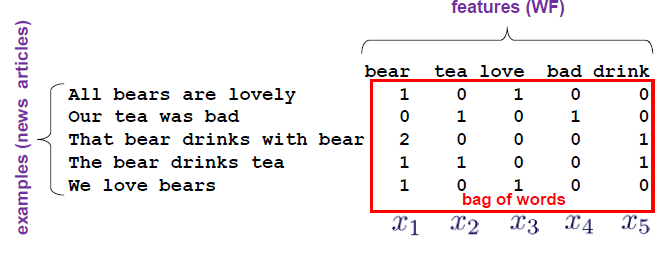

Source: From Course Slides

In [44]:
## Bag of Words on General Tweets

vectorizer_WF_gen = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_WF_gen = vectorizer_WF_gen.fit_transform(tw_df_copy['text_clean_tokenized'])

# print(vectorizer_WF_gen.get_feature_names())
# print(array_WF_gen)

#### TF-IDF creates a set of its own vocabulary from the entire set of documents. It is short for “term frequency - inverse document frequency”

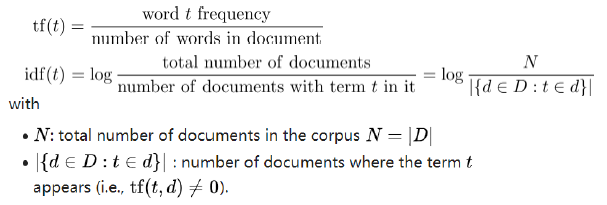

#### In this way, the method addresses the fact that all words should not be weighted equally. It weighs by indicating the words that are most unique to the document, and best used to characterize it.

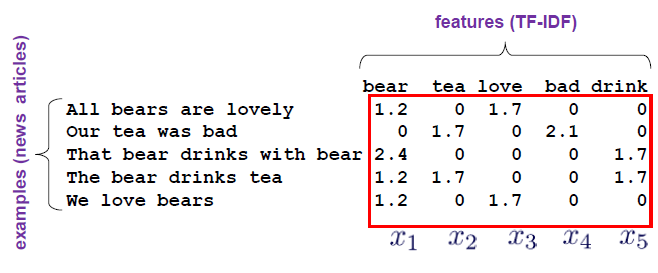

Source: From Course Slides

In [45]:
## TF-IDF on General Tweets

vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_TFIDF_gen = vectorizer_TFIDF_gen.fit_transform(tw_df_copy['text_clean_tokenized'])

# print( vectorizer_TFIDF_gen.get_feature_names() )
# print( array_TFIDF_gen )

In [46]:
## Assigning target variable here

y = tw_df_copy['class']

## 2. Implementing Algorithms - (Logistic Regression, KNN, Decision Trees, Random Forest, Naive Bayes, Support Vector Machines and XGBoost Classifier) on both sets of features

In [47]:
def logreg(x,y,split_ratio=0.3):
    
    '''Function for modeling based on Logistic Regression'''
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
    
    model_lg = LogisticRegression()
    model_lg.fit(X_train,y_train)
    
    predictions = model_lg.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the Log Reg model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))
    
    return score

In [48]:
logreg_bow = logreg(array_WF_gen,y), 
logreg_tfidf = logreg(array_TFIDF_gen,y)

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Log Reg model is:  71.15
              precision    recall  f1-score   support

           0       0.75      0.64      0.69     30063
           4       0.68      0.78      0.73     29937

   micro avg       0.71      0.71      0.71     60000
   macro avg       0.72      0.71      0.71     60000
weighted avg       0.72      0.71      0.71     60000

[[19218 10845]
 [ 6465 23472]]
The accuracy of the Log Reg model is:  71.14
              precision    recall  f1-score   support

           0       0.75      0.64      0.69     30063
           4       0.68      0.78      0.73     29937

   micro avg       0.71      0.71      0.71     60000
   macro avg       0.72      0.71      0.71     60000
weighted avg       0.72      0.71      0.71     60000

[[19214 10849]
 [ 6467 23470]]


In [49]:
def knn(x,y,split_ratio=0.3,neighbors=5):
    
    '''Function for modeling based on K-Nearest Neighbors'''
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
    
    model_knn =  KNeighborsClassifier(n_neighbors=neighbors)
    model_knn.fit(X_train,y_train)
    
    predictions = model_knn.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the KNN model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))
    
    return score

In [50]:
knn_bow = knn(array_WF_gen,y)
knn_tfidf =  knn(array_TFIDF_gen,y)

The accuracy of the KNN model is:  65.42666666666666
              precision    recall  f1-score   support

           0       0.67      0.60      0.63     30063
           4       0.64      0.71      0.67     29937

   micro avg       0.65      0.65      0.65     60000
   macro avg       0.66      0.65      0.65     60000
weighted avg       0.66      0.65      0.65     60000

[[17994 12069]
 [ 8675 21262]]
The accuracy of the KNN model is:  63.81666666666666
              precision    recall  f1-score   support

           0       0.66      0.57      0.61     30063
           4       0.62      0.70      0.66     29937

   micro avg       0.64      0.64      0.64     60000
   macro avg       0.64      0.64      0.64     60000
weighted avg       0.64      0.64      0.64     60000

[[17263 12800]
 [ 8910 21027]]


In [51]:
def decision_tree(x,y,split_ratio=0.3):
    
    '''Function for modeling based on Decision Tree Classifier'''
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
    
    model_dtc =  DecisionTreeClassifier(random_state=1)
    model_dtc.fit(X_train,y_train)
    
    predictions = model_dtc.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the Decision Tree Classifier model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))
    
    return score

In [52]:
dt_bow = decision_tree(array_WF_gen,y)
dt_tfidf = decision_tree(array_TFIDF_gen,y)

The accuracy of the Decision Tree Classifier model is:  65.46499999999999
              precision    recall  f1-score   support

           0       0.66      0.64      0.65     30063
           4       0.65      0.67      0.66     29937

   micro avg       0.65      0.65      0.65     60000
   macro avg       0.65      0.65      0.65     60000
weighted avg       0.65      0.65      0.65     60000

[[19228 10835]
 [ 9886 20051]]
The accuracy of the Decision Tree Classifier model is:  65.46166666666666
              precision    recall  f1-score   support

           0       0.66      0.64      0.65     30063
           4       0.65      0.67      0.66     29937

   micro avg       0.65      0.65      0.65     60000
   macro avg       0.65      0.65      0.65     60000
weighted avg       0.65      0.65      0.65     60000

[[19228 10835]
 [ 9888 20049]]


In [53]:
def ran_forest(x,y,split_ratio=0.3):
    
    '''Function for modeling based on Random Forest Classifier'''
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
    
    model_rfc =  RandomForestClassifier()
    model_rfc.fit(X_train,y_train)
    
    predictions = model_rfc.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the Random Forest Classifier model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))    
    
    return score

In [54]:
rf_bow = ran_forest(array_WF_gen,y)
rf_tfidf = ran_forest(array_TFIDF_gen,y)

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  67.79166666666666
              precision    recall  f1-score   support

           0       0.69      0.65      0.67     30063
           4       0.67      0.71      0.69     29937

   micro avg       0.68      0.68      0.68     60000
   macro avg       0.68      0.68      0.68     60000
weighted avg       0.68      0.68      0.68     60000

[[19475 10588]
 [ 8737 21200]]


D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  67.91166666666668
              precision    recall  f1-score   support

           0       0.69      0.65      0.67     30063
           4       0.67      0.71      0.69     29937

   micro avg       0.68      0.68      0.68     60000
   macro avg       0.68      0.68      0.68     60000
weighted avg       0.68      0.68      0.68     60000

[[19413 10650]
 [ 8603 21334]]


In [55]:
def xgb_classifier(x,y,split_ratio=0.3):
    
    '''Function for modeling based on XGBoost Classifier'''
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
    
    model_xgb = XGBClassifier()
    model_xgb.fit(X_train,y_train)
    
    predictions = model_xgb.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the XGBoost Classifier model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))    
    
    return score

In [56]:
xgb_bow = xgb_classifier(array_WF_gen,y)
xgb_tfidf = xgb_classifier(array_TFIDF_gen,y)

The accuracy of the XGBoost Classifier model is:  65.61
              precision    recall  f1-score   support

           0       0.78      0.43      0.56     30063
           4       0.61      0.88      0.72     29937

   micro avg       0.66      0.66      0.66     60000
   macro avg       0.70      0.66      0.64     60000
weighted avg       0.70      0.66      0.64     60000

[[13046 17017]
 [ 3617 26320]]
The accuracy of the XGBoost Classifier model is:  65.61
              precision    recall  f1-score   support

           0       0.78      0.43      0.56     30063
           4       0.61      0.88      0.72     29937

   micro avg       0.66      0.66      0.66     60000
   macro avg       0.70      0.66      0.64     60000
weighted avg       0.70      0.66      0.64     60000

[[13046 17017]
 [ 3617 26320]]


In [57]:
def naive_bayes_gaussianNB(x,y,split_ratio=0.3):
    
    '''Function for modeling based on Naive-Bayes GaussianNB Classifier'''
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
    
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    
    model_nbg = GaussianNB()
    model_nbg.fit(X_train,y_train)
    
    predictions = model_nbg.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the Naive-Bayes GaussianNB Classifier model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))    
    
    return score

In [58]:
nb_bow = naive_bayes_gaussianNB(array_WF_gen,y)
nb_tfidf = naive_bayes_gaussianNB(array_TFIDF_gen,y)

The accuracy of the Naive-Bayes GaussianNB Classifier model is:  67.20833333333334
              precision    recall  f1-score   support

           0       0.73      0.55      0.63     30063
           4       0.64      0.80      0.71     29937

   micro avg       0.67      0.67      0.67     60000
   macro avg       0.68      0.67      0.67     60000
weighted avg       0.68      0.67      0.67     60000

[[16487 13576]
 [ 6099 23838]]
The accuracy of the Naive-Bayes GaussianNB Classifier model is:  67.20833333333334
              precision    recall  f1-score   support

           0       0.73      0.55      0.63     30063
           4       0.64      0.80      0.71     29937

   micro avg       0.67      0.67      0.67     60000
   macro avg       0.68      0.67      0.67     60000
weighted avg       0.68      0.67      0.67     60000

[[16487 13576]
 [ 6099 23838]]


In [59]:
def svm_classifier(x,y,split_ratio=0.3):
    
    '''Function for modeling based on SVM (Support Vector Machines) Classifier'''
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
    
    model_svm = svm.SVC(gamma='scale')
    model_svm.fit(X_train,y_train)
    
    predictions = model_svm.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the SVM Classifier model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))    
    
    return score

In [80]:
svm_bow = svm_classifier(array_WF_gen,y)
svm_tfidf = svm_classifier(array_TFIDF_gen,y)

The accuracy of the SVM Classifier model is:  71.00333333333333
              precision    recall  f1-score   support

           0       0.76      0.62      0.68     30063
           4       0.68      0.80      0.73     29937

   micro avg       0.71      0.71      0.71     60000
   macro avg       0.72      0.71      0.71     60000
weighted avg       0.72      0.71      0.71     60000

[[18719 11344]
 [ 6054 23883]]
The accuracy of the SVM Classifier model is:  70.95666666666666
              precision    recall  f1-score   support

           0       0.75      0.63      0.68     30063
           4       0.68      0.79      0.73     29937

   micro avg       0.71      0.71      0.71     60000
   macro avg       0.72      0.71      0.71     60000
weighted avg       0.72      0.71      0.71     60000

[[18818 11245]
 [ 6181 23756]]


### Plotting the accuracies for each model and type of feature

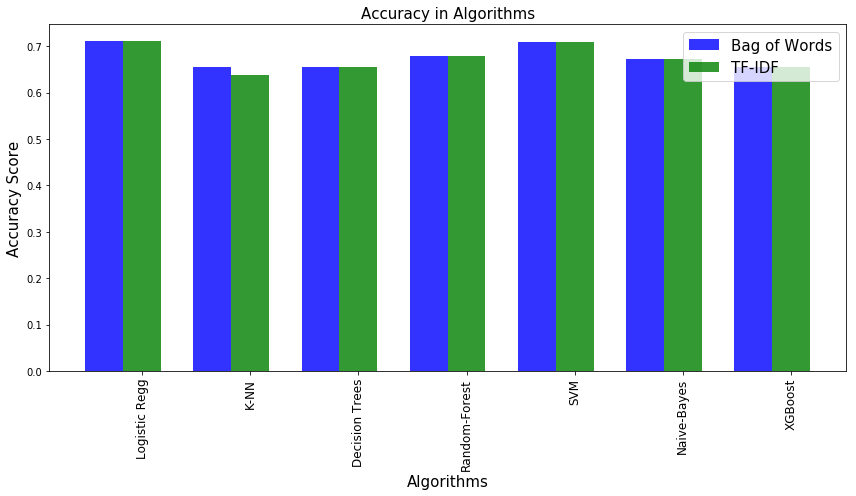

In [81]:
x_axis = ['Logistic Regg', 'K-NN', 'Decision Trees', 'Random-Forest', 'SVM', 'Naive-Bayes', 'XGBoost']
y_bow = [logreg_bow, knn_bow, dt_bow, rf_bow, svm_bow, nb_bow, xgb_bow]
y_tfidf = [logreg_tfidf, knn_tfidf, dt_tfidf, rf_tfidf, svm_tfidf, nb_tfidf, xgb_tfidf]

# data to plot
n_groups = 7

# create plot
fig, ax = plt.subplots(figsize=(12,7))

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, y_bow, bar_width,
alpha=opacity,
color='b',
label='Bag of Words')

rects2 = plt.bar(index + bar_width, y_tfidf, bar_width,
alpha=opacity,
color='g',
label='TF-IDF')

plt.xlabel('Algorithms', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Accuracy in Algorithms', fontsize = 15)
plt.xticks(index + bar_width, (x_axis), rotation = 90,  fontsize = 12)
plt.legend(fontsize = 15)

plt.tight_layout()
plt.show()

**As we can see, the accuracy achieved by Logistic Regression and SVM model is highest on Bag of Words features. However, as SVM is computationally expensive, we will go forward with the Logistic Regression model. So now we apply the Logistic Regression Model on Elections Dataset**

# Part D: Model Implementation

## 1. Applying Bag of Words on the Elections Dataset below

In [82]:
vectorizer_WF_ele = CountVectorizer(max_features=1000) # Choosing the same no of features here as taken in general elections to maintain same shape of features 
array_WF_ele = vectorizer_WF_ele.fit_transform(can_ele_2019_copy['text_clean_tokenized'])

# print(vectorizer_WF_ele.get_feature_names())
# print(array_WF_ele)

In [83]:
## Encoding the target based on classes of general dataset
can_ele_2019_copy['class'] = can_ele_2019_copy['sentiment'].map({'positive':4,'negative':0})

## Initializing the target variable
y_ele=can_ele_2019_copy['class']

## 2. Implementing the best model on Elections dataset

In [84]:
def logreg_ele(x1,y1,x2,y2,split_ratio=0.3):
    
    ''' Function to implement the best model from general dataset on election dataset'''
    
    X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.3,random_state=1)
    
    model = LogisticRegression()
    model.fit(X_train,y_train)
    
    predictions = model.predict(x2)
    
    score = accuracy_score(y2,predictions)

    print ("The accuracy of the Log Reg model of Canadian Elections Tweets is: ", score*100)
    
    print(classification_report(y2,predictions))
    
    print (confusion_matrix(y2,predictions))
    
    return predictions, score

In [85]:
predictions, election_score = logreg_ele(array_WF_gen, y, array_WF_ele, y_ele)

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Log Reg model of Canadian Elections Tweets is:  49.41397093295827
              precision    recall  f1-score   support

           0       0.47      0.56      0.51      1006
           4       0.53      0.43      0.48      1127

   micro avg       0.49      0.49      0.49      2133
   macro avg       0.50      0.50      0.49      2133
weighted avg       0.50      0.49      0.49      2133

[[564 442]
 [637 490]]


### We get an accuracy of **49.41%** from the best model applied to the elections dataset. This means half of the predictions were correctly predicted and half were incorrect.

### Let's see how the predictions were for each of the parties

In [86]:
## Below model creates a column that states whether the prediction made was correct or incorrect

can_ele_2019_copy['predictions'] = predictions
can_ele_2019_copy['prediction_sentiment'] = can_ele_2019_copy['predictions'].map({0:'negative',4:'positive'})
can_ele_2019_copy['sentiment_vs_prediction'] = '0'

for i in range(len(can_ele_2019_copy['sentiment_vs_prediction'])):
    if can_ele_2019_copy['class'][i]==can_ele_2019_copy['predictions'][i]:
        can_ele_2019_copy['sentiment_vs_prediction'][i]='truly_predicted'
    else:
        can_ele_2019_copy['sentiment_vs_prediction'][i]='falsely_predicted'

can_ele_2019_copy  # Take a look at the last column i.e. 'sentiment_vs_prediction'

D:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,sentiment,negative_reason,text,text_clean,text_clean_tokenized,political_party,class,predictions,prediction_sentiment,sentiment_vs_prediction
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[""@rosiebarton so instead of your suggestion, ...",rosiebarton suggest agre canadian women trust ...,Conservative,0,4,positive,falsely_predicted
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","[""#allwomanspacewalk it's real!@space_station ...",allwomanspacewalk space_st etobicokenorth city...,None,4,4,positive,truly_predicted
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[""#brantford it's going to cost you $94 billio...",brantford go cost 94 billion 4 year justin elx...,Liberal,0,4,positive,falsely_predicted
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","[""#canada #canadaelection2019 #canadavotes #el...",canada canadaelection2019 canadavot elxn43 dec...,None,4,4,positive,truly_predicted
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[""#canada #taxpayers are sick & tired of havin...",canada taxpay sick tire earn donat corpor welf...,Liberal,0,0,negative,truly_predicted
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","[""#canadavotes2019 #elxn43 #cdnpoli - facts - ...",canadavotes2019 elxn43 cdnpoli fact blastfromt...,Conservative,0,0,negative,truly_predicted
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","[""#cdnmedia #elxn43 #cdnpoli #ppc rocky dong h...",cdnmedia elxn43 cdnpoli ppc rocki dong hand be...,None,4,0,negative,falsely_predicted
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","[""#cdnpoli #elxn43 the liberals ++ more than d...",cdnpoli elxn43 liber doubl promis 2015 nation ...,Mixed,4,0,negative,falsely_predicted
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","[""#chooseforward #cdnpoli #elxn43canada, don't...",chooseforward cdnpoli elxn43canada america mis...,None,0,0,negative,truly_predicted
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","[""#cpckinsellagatelet's see the receipts. who ...",cpckinsellagatelet receipt pay warren kinsella...,Mixed,0,0,negative,truly_predicted


**Plotting the predictions of each party below**

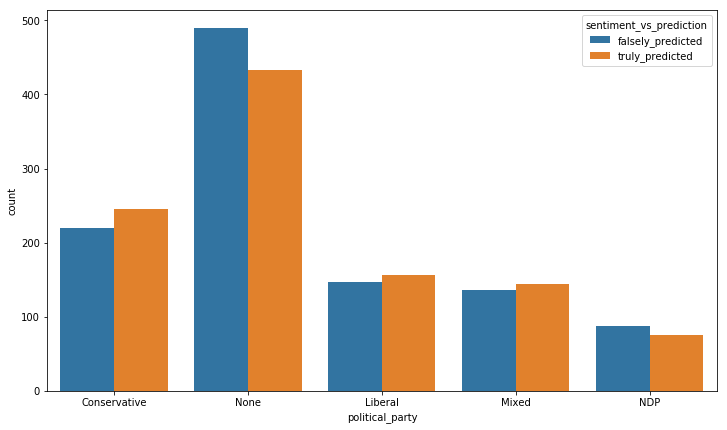

In [87]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=can_ele_2019_copy, hue='sentiment_vs_prediction')

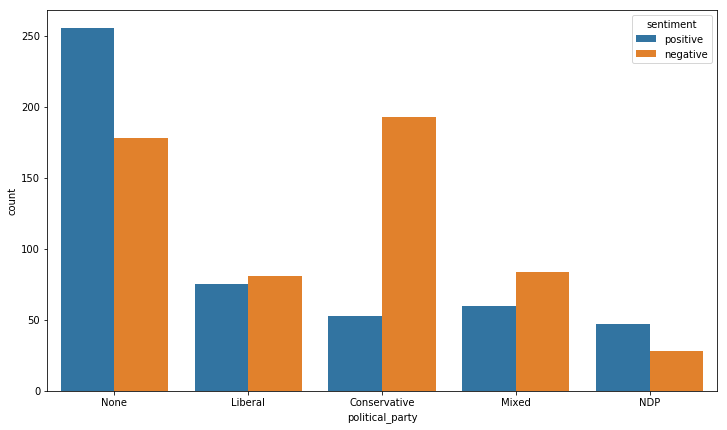

In [89]:
## Looking at the count of positive and negative tweets in correct predictions

plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=can_ele_2019_copy[can_ele_2019_copy['sentiment_vs_prediction']=='truly_predicted'], hue='sentiment')

**As we can see, the Conservative Party's negative predictions outnumber the positive predictions by thrice. The Liberal party's positive and negative predicitons count is almost the same which could mean that half of the public has positive viewpoint and other half as negative viewpoint on the Liberal party. The count of tweets itself for the NDP party is low which signifies that it is not much in the running for elections. However, their response is more positive, it can mean that in upcoming future, it may emerge as significant running party**

**The total count of positive and negative tweets in the Mixed and None class is almost equivalent (positive may surpass negative). This shows that the part of public which is neutral has good/positive viewpoint of the current running government i.e. Liberal Party**

**Fact: Liberal Party won 2019 Federal Elections**

**This shows that NLP analytics of tweets can act as an indicator of the elections outcome. Tweets play the role of voice of the general public. So, it can be useful for political parties to do NLP of tweets to know where they stand and what they should change to turn the election result towards them**

## 3. Fitting three models on the column 'negative_reason' of all negative tweets

In [72]:
## Splitting the dataset to consist only negative tweets of election dataset

can_ele_neg_split = can_ele_2019_copy[can_ele_2019_copy['sentiment']=='negative']
can_ele_neg_split

,sentiment,negative_reason,text,text_clean,text_clean_tokenized,political_party,class,predictions,prediction_sentiment,sentiment_vs_prediction
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[""@rosiebarton so instead of your suggestion, ...",rosiebarton suggest agre canadian women trust ...,Conservative,0,4,positive,falsely_predicted
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[""#brantford it's going to cost you $94 billio...",brantford go cost 94 billion 4 year justin elx...,Liberal,0,4,positive,falsely_predicted
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[""#canada #taxpayers are sick & tired of havin...",canada taxpay sick tire earn donat corpor welf...,Liberal,0,0,negative,truly_predicted
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","[""#canadavotes2019 #elxn43 #cdnpoli - facts - ...",canadavotes2019 elxn43 cdnpoli fact blastfromt...,Conservative,0,0,negative,truly_predicted
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","[""#chooseforward #cdnpoli #elxn43canada, don't...",chooseforward cdnpoli elxn43canada america mis...,None,0,0,negative,truly_predicted
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","[""#cpckinsellagatelet's see the receipts. who ...",cpckinsellagatelet receipt pay warren kinsella...,Mixed,0,0,negative,truly_predicted
14,negative,Others,"b""#Kinsella runs deep w #CPC...both he and #Ly...","[""#kinsella runs deep w #cpc...both he and #ly...",kinsella run deep cpc lyingandi craze trudeau ...,Mixed,0,4,positive,falsely_predicted
15,negative,Tell lies,"b""#LyingAndy has a history of not answering em...","[""#lyingandy has a history of not answering em...",lyingandi histori answer embarrass question an...,Conservative,0,4,positive,falsely_predicted
19,negative,Scandal,"b""*Urgent* Please watch this video by David Ha...","[""*urgent* please watch this video by david ha...",urgent watch video david haskel peopl parti ca...,Conservative,0,0,negative,truly_predicted
20,negative,Others,"b'""... it\'s our policy not to comment on ille...","['""... it\'s our policy not to comment on ille...",polici comment illeg immor nefari activ cpc ju...,Mixed,0,4,positive,falsely_predicted


In [73]:
## Finding the count of each negative reason

can_ele_neg_split.groupby(['negative_reason'])['negative_reason'].count()

negative_reason
Climate Problem                         41
Economy                                 51
Healthcare                               5
Healthcare and Marijuana                 4
Others                                 364
Privilege                               12
Scandal                                270
Separation                              16
Tell lies                              198
Women Reproductive right and Racism     45
Name: negative_reason, dtype: int64

### Let's combine some classes together so we have enough count for each class to model upon

Reasons Combined:

1. Economy + Privelege = Economy 
(both Economy and Privilege Tweets talk about the economy (and policies) of the country)
2. Healthcare + Healthcare and Marijuana + Women Reproductive right and Racism = Healthcare 
(All of these classes come under a single umbrella of Healthcare)
3. Tell Lies + Separation = Manipulative
(these classes represent manipulative tweets, so renames them as Manipulative)

In [74]:
## Combining the classes as per the reasons given above

can_ele_neg_split=can_ele_neg_split.reset_index()
can_ele_neg_split['grouped_reasons'] = '0'

for i in range(len(can_ele_neg_split['negative_reason'])):
    if (can_ele_neg_split['negative_reason'][i]=='Climate Problem'):
        can_ele_neg_split['grouped_reasons'][i] = 'Climate Problem'
    elif (can_ele_neg_split['negative_reason'][i]=='Economy') | (can_ele_neg_split['negative_reason'][i]=='Privilege') :
        can_ele_neg_split['grouped_reasons'][i] = 'Economy'
    elif (can_ele_neg_split['negative_reason'][i]=='Healthcare') | (can_ele_neg_split['negative_reason'][i]=='Healthcare and Marijuana') | (can_ele_neg_split['negative_reason'][i]=='Women Reproductive right and Racism') :
        can_ele_neg_split['grouped_reasons'][i] = 'Healthcare'
    elif can_ele_neg_split['negative_reason'][i]=='Scandal' :
        can_ele_neg_split['grouped_reasons'][i] = 'Scandalous'
    elif (can_ele_neg_split['negative_reason'][i]=='Tell lies') | (can_ele_neg_split['negative_reason'][i]=='Separation') :
        can_ele_neg_split['grouped_reasons'][i] = 'Manipulative'
    elif can_ele_neg_split['negative_reason'][i]=='Others':
        can_ele_neg_split['grouped_reasons'][i] = 'Others'

can_ele_neg_split        

D:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:12

,index,sentiment,negative_reason,text,text_clean,text_clean_tokenized,political_party,class,predictions,prediction_sentiment,sentiment_vs_prediction,grouped_reasons
0,0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[""@rosiebarton so instead of your suggestion, ...",rosiebarton suggest agre canadian women trust ...,Conservative,0,4,positive,falsely_predicted,Healthcare
1,2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[""#brantford it's going to cost you $94 billio...",brantford go cost 94 billion 4 year justin elx...,Liberal,0,4,positive,falsely_predicted,Economy
2,4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[""#canada #taxpayers are sick & tired of havin...",canada taxpay sick tire earn donat corpor welf...,Liberal,0,0,negative,truly_predicted,Economy
3,5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","[""#canadavotes2019 #elxn43 #cdnpoli - facts - ...",canadavotes2019 elxn43 cdnpoli fact blastfromt...,Conservative,0,0,negative,truly_predicted,Others
4,8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","[""#chooseforward #cdnpoli #elxn43canada, don't...",chooseforward cdnpoli elxn43canada america mis...,None,0,0,negative,truly_predicted,Others
5,9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","[""#cpckinsellagatelet's see the receipts. who ...",cpckinsellagatelet receipt pay warren kinsella...,Mixed,0,0,negative,truly_predicted,Scandalous
6,14,negative,Others,"b""#Kinsella runs deep w #CPC...both he and #Ly...","[""#kinsella runs deep w #cpc...both he and #ly...",kinsella run deep cpc lyingandi craze trudeau ...,Mixed,0,4,positive,falsely_predicted,Others
7,15,negative,Tell lies,"b""#LyingAndy has a history of not answering em...","[""#lyingandy has a history of not answering em...",lyingandi histori answer embarrass question an...,Conservative,0,4,positive,falsely_predicted,Manipulative
8,19,negative,Scandal,"b""*Urgent* Please watch this video by David Ha...","[""*urgent* please watch this video by david ha...",urgent watch video david haskel peopl parti ca...,Conservative,0,0,negative,truly_predicted,Scandalous
9,20,negative,Others,"b'""... it\'s our policy not to comment on ille...","['""... it\'s our policy not to comment on ille...",polici comment illeg immor nefari activ cpc ju...,Mixed,0,4,positive,falsely_predicted,Others


In [75]:
## Printing count of reasons after grouping

can_ele_neg_split.groupby(['grouped_reasons'])['grouped_reasons'].count()

grouped_reasons
Climate Problem     41
Economy             63
Healthcare          54
Manipulative       214
Others             364
Scandalous         270
Name: grouped_reasons, dtype: int64

In [76]:
## Implementing Bag of Words on the split dataset

vectorizer_WF_ele_neg = CountVectorizer()
array_WF_ele_neg = vectorizer_WF_ele_neg.fit_transform(can_ele_neg_split['text_clean_tokenized'])

# print(vectorizer_WF_ele_neg.get_feature_names())
# print(array_WF_ele_neg)

['00', '000', '043', '10', '100', '1000', '100s', '12', '120', '123', '13', '1300', '132', '134', '136', '15', '159', '16', '160b', '18', '180', '1800', '19', '1990', '1993', '1independ', '1lorik', '1mikemorri', '1st', '20', '200', '2003', '2004', '2005', '2006', '2012', '2014', '2015', '2016', '2018', '2019', '2020', '2022', '2023', '2024', '2030', '21', '21st', '22djstu', '23', '23k', '24', '243', '25', '2b', '2decid', '2justin', '2nd', '30', '300', '30k', '31', '32', '33', '338canada', '35', '350k', '36', '39', '3rd', '3rdtimewalt', '460', '461scheer', '47', '48', '4pts', '4th', '4x', '50', '500', '53', '537', '55', '5th', '60', '600', '6000', '600000000', '600mill', '63', '67', '6conserv', '6doug', '720p', '7b', '80', '80k', '83', '86', '88', '90', '905', '93', '94', '95', '999', '99freemind', '9th', '9yr', 'aarongunn', 'aartipol', 'abblib', 'abc', 'abc2019', 'abdaniellesmith', 'abe', 'abid', 'abigailbimman', 'abil', 'abject', 'ableg', 'aboard', 'aborigin', 'abort', 'abortionisawom

In [77]:
## Setting the target variable as the classes of reasons

y_ele_neg=can_ele_neg_split['grouped_reasons']

### Implementing the Logistic Regg, Decision Tree and Random Forest Classifier models

In [79]:
logreg(array_WF_ele_neg,y_ele_neg), decision_tree(array_WF_ele_neg,y_ele_neg), ran_forest(array_WF_ele_neg,y_ele_neg)

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of the Log Reg model is:  59.27152317880795
                 precision    recall  f1-score   support

Climate Problem       1.00      0.27      0.43        11
        Economy       0.60      0.16      0.25        19
     Healthcare       0.50      0.18      0.27        11
   Manipulative       0.62      0.55      0.58        64
         Others       0.55      0.81      0.65       114
     Scandalous       0.66      0.53      0.59        83

      micro avg       0.59      0.59      0.59       302
      macro avg       0.66      0.42      0.46       302
   weighted avg       0.61      0.59      0.57       302

[[ 3  1  0  2  4  1]
 [ 0  3  0  4 10  2]
 [ 0  0  2  3  5  1]
 [ 0  1  0 35 20  8]
 [ 0  0  1 10 92 11]
 [ 0  0  1  2 36 44]]
The accuracy of the Decision Tree Classifier model is:  54.966887417218544
                 precision    recall  f1-score   support

Climate Problem       0.67      0.36      0.47        11
        Economy       0.33      0.21      0.26       

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.5927152317880795, 0.5496688741721855, 0.5761589403973509)

### Best Accuracy achieved by Logistic Regression model (59.27%)

# Part E: Results

In [96]:
can_ele_2019_copy[(can_ele_2019_copy['sentiment_vs_prediction']=='truly_predicted') & (can_ele_2019_copy['political_party']=='Conservative') & (can_ele_2019_copy['sentiment']=='positive')].count()

sentiment                  53
negative_reason             0
text                       53
text_clean                 53
text_clean_tokenized       53
political_party            53
class                      53
predictions                53
prediction_sentiment       53
sentiment_vs_prediction    53
dtype: int64

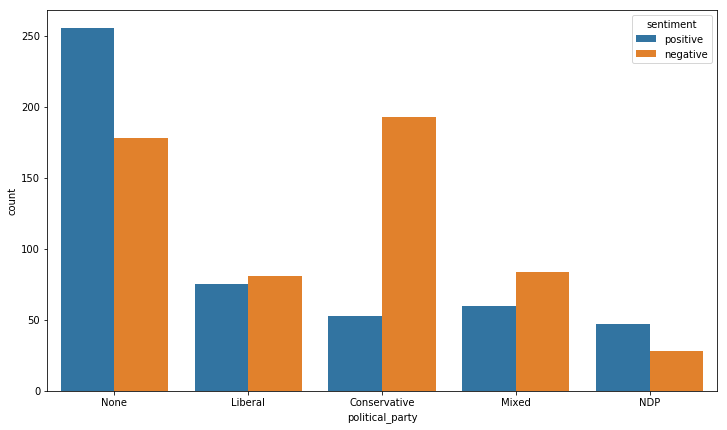

In [90]:
## Looking at the count of positive and negative tweets in correct predictions

plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=can_ele_2019_copy[can_ele_2019_copy['sentiment_vs_prediction']=='truly_predicted'], hue='sentiment')

Research Question: “What can public opinion on Twitter tell us about the Canadian political landscape in 2019?”

Answer: We found out through our NLP analysis of the Canadian Elections 2019 tweets, the Conservative party had an overall negative response while the Liberal and NDP had neutral responses. However, NDP being not so prominent in the current political landscape could not gather much votes. So, the outcome of the federal elections 2019 was that the Liberal party won.

Moreover, the total count of positive responses in Mixed and None categories surpass the negative responses which meant that the public was satisfied (not completely obviously) with the current government of Liberal party

The tweets by the public acted as an indicator to where the election was going. They can tell how the public views the political parties and it is their viewpoint which is reflected from votes. Thus, public tweets of 2019 portrayed/predicted what the Canadian Elections result would be.

Describe the results of the analysis and discuss your interpretation of the results. 

Explain how each party is viewed in the public eye based on the sentiment value.



For the second model, based on the model that worked best, provide a few reasons why your model may fail to predict the correct negative reasons. 

Back up your reasoning with examples from the test sets. 

For both models, suggest one way you can improve the accuracy of your models.

Q - For the second model, based on the model that worked best, provide a few reasons why your model may fail to predict the correct negative reasons.

As we achieved an accuracy of 59.27% with Logistic Regression (highest), this model may fail to predict the correct negative reasons

## BONUS

In [58]:
size=100
tokenized_sentences = [sentence.split() for sentence in corpus_clean_gen]
model_word2vec = word2vec.Word2Vec(tokenized_sentences, size=size, min_count=1)

In [59]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    if text == '':
        return vec
    else:
        text = text.split(' ')
        for word in text:
            vec += model_word2vec[word].reshape((1, size))
            count += 1.
    if count != 0:
        vec /= count
    return vec

In [60]:
array_wordEmbedding = np.concatenate([buildWordVector(z, size) for z in corpus_clean_gen])

D:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [61]:
logreg(array_wordEmbedding,y), knn(array_wordEmbedding,y), decision_tree(array_wordEmbedding,y), ran_forest(array_wordEmbedding,y)

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Log Reg model is:  66.12666666666667
              precision    recall  f1-score   support

           0       0.68      0.62      0.65     30063
           4       0.65      0.70      0.67     29937

   micro avg       0.66      0.66      0.66     60000
   macro avg       0.66      0.66      0.66     60000
weighted avg       0.66      0.66      0.66     60000

[[18769 11294]
 [ 9030 20907]]
The accuracy of the KNN model is:  62.834999999999994
              precision    recall  f1-score   support

           0       0.63      0.62      0.63     30063
           4       0.63      0.64      0.63     29937

   micro avg       0.63      0.63      0.63     60000
   macro avg       0.63      0.63      0.63     60000
weighted avg       0.63      0.63      0.63     60000

[[18663 11400]
 [10899 19038]]
The accuracy of the Decision Tree Classifier model is:  59.06333333333333
              precision    recall  f1-score   support

           0       0.59      0.59      0.59 

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  62.79
              precision    recall  f1-score   support

           0       0.62      0.68      0.65     30063
           4       0.64      0.57      0.60     29937

   micro avg       0.63      0.63      0.63     60000
   macro avg       0.63      0.63      0.63     60000
weighted avg       0.63      0.63      0.63     60000

[[20593  9470]
 [12856 17081]]


(0.6612666666666667, 0.62835, 0.5906333333333333, 0.6279)

In [62]:
vectorizer_TFIDF_gen2 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=4500, ngram_range=(1,3))
array_TFIDF_gen2 = vectorizer_TFIDF_gen2.fit_transform(tw_df_copy['text_clean_tokenized'])

# print( vectorizer_TFIDF_gen.get_feature_names() )
print( array_TFIDF_gen2 )

  (0, 340)	7.854219512041607
  (0, 631)	8.024294095225589
  (0, 3444)	9.542515999388028
  (0, 1011)	7.342446469919577
  (0, 3889)	8.600907459529584
  (0, 1016)	3.7414051807712645
  (1, 4149)	7.279151619547263
  (1, 4141)	6.209396157341136
  (1, 1388)	6.795902763551506
  (1, 3871)	6.784455377711156
  (1, 948)	6.381703975474588
  (1, 3356)	5.196714568887629
  (1, 3937)	4.125959860591465
  (1, 492)	7.927962986287157
  (1, 3360)	8.402056600784416
  (2, 1170)	9.709570084051194
  (2, 373)	7.746492131373515
  (2, 2514)	7.406984991057148
  (2, 3349)	7.034377048106759
  (2, 99)	7.821582582728585
  (2, 3242)	6.549351121339282
  (2, 559)	9.274252012793347
  (3, 1437)	4.477651553813062
  (3, 2179)	9.047194562158001
  (3, 1502)	7.688624749052966
  :	:
  (199991, 1313)	8.064414089015013
  (199991, 3620)	8.130903830283847
  (199992, 2402)	4.425136531945286
  (199992, 2562)	6.102755582991562
  (199992, 2748)	5.1010721079704275
  (199992, 1869)	5.05676480188233
  (199992, 616)	6.760357826132095
  (1999

In [63]:
logreg(array_TFIDF_gen2,y), knn(array_TFIDF_gen2,y), decision_tree(array_TFIDF_gen2,y), ran_forest(array_TFIDF_gen2,y)

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Log Reg model is:  72.6
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     30063
           4       0.71      0.77      0.74     29937

   micro avg       0.73      0.73      0.73     60000
   macro avg       0.73      0.73      0.73     60000
weighted avg       0.73      0.73      0.73     60000

[[20376  9687]
 [ 6753 23184]]
The accuracy of the KNN model is:  64.63166666666666
              precision    recall  f1-score   support

           0       0.66      0.59      0.63     30063
           4       0.63      0.70      0.66     29937

   micro avg       0.65      0.65      0.65     60000
   macro avg       0.65      0.65      0.65     60000
weighted avg       0.65      0.65      0.65     60000

[[17859 12204]
 [ 9017 20920]]
The accuracy of the Decision Tree Classifier model is:  66.31
              precision    recall  f1-score   support

           0       0.66      0.67      0.67     30063
           4    

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  69.22500000000001
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     30063
           4       0.69      0.70      0.69     29937

   micro avg       0.69      0.69      0.69     60000
   macro avg       0.69      0.69      0.69     60000
weighted avg       0.69      0.69      0.69     60000

[[20691  9372]
 [ 9093 20844]]


(0.726, 0.6463166666666667, 0.6631, 0.69225)

In [64]:
vectorizer_WF_gen2 = CountVectorizer(max_features=4500, ngram_range=(1,3))
array_WF_gen2 = vectorizer_WF_gen2.fit_transform(tw_df_copy['text_clean_tokenized'])

# print(vectorizer_WF_gen.get_feature_names())
print(array_WF_gen2)

  (0, 1016)	1
  (0, 3889)	1
  (0, 1011)	1
  (0, 3444)	1
  (0, 631)	1
  (0, 340)	1
  (1, 3360)	1
  (1, 492)	1
  (1, 3937)	1
  (1, 3356)	1
  (1, 948)	1
  (1, 3871)	1
  (1, 1388)	1
  (1, 4141)	1
  (1, 4149)	1
  (2, 559)	1
  (2, 3242)	1
  (2, 99)	1
  (2, 3349)	1
  (2, 2514)	1
  (2, 373)	1
  (2, 1170)	1
  (3, 1502)	1
  (3, 2179)	1
  (3, 1437)	1
  :	:
  (199991, 1313)	1
  (199991, 3051)	1
  (199992, 2750)	1
  (199992, 616)	1
  (199992, 1869)	1
  (199992, 2748)	1
  (199992, 2562)	1
  (199992, 2402)	1
  (199993, 4361)	1
  (199994, 2269)	1
  (199995, 1869)	1
  (199995, 2340)	1
  (199995, 1502)	1
  (199997, 1341)	1
  (199997, 2835)	1
  (199997, 2800)	1
  (199997, 1536)	1
  (199997, 4061)	1
  (199998, 2019)	1
  (199998, 2356)	1
  (199998, 1497)	1
  (199999, 564)	1
  (199999, 1597)	1
  (199999, 3063)	1
  (199999, 2446)	1


In [65]:
logreg(array_WF_gen2,y), knn(array_WF_gen2,y), decision_tree(array_WF_gen2,y), ran_forest(array_WF_gen2,y)

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Log Reg model is:  72.81666666666666
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     30063
           4       0.71      0.78      0.74     29937

   micro avg       0.73      0.73      0.73     60000
   macro avg       0.73      0.73      0.73     60000
weighted avg       0.73      0.73      0.73     60000

[[20407  9656]
 [ 6654 23283]]
The accuracy of the KNN model is:  65.62
              precision    recall  f1-score   support

           0       0.68      0.60      0.64     30063
           4       0.64      0.71      0.67     29937

   micro avg       0.66      0.66      0.66     60000
   macro avg       0.66      0.66      0.66     60000
weighted avg       0.66      0.66      0.66     60000

[[18077 11986]
 [ 8642 21295]]
The accuracy of the Decision Tree Classifier model is:  66.31
              precision    recall  f1-score   support

           0       0.66      0.67      0.67     30063
           4   

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  69.41666666666667
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     30063
           4       0.69      0.70      0.70     29937

   micro avg       0.69      0.69      0.69     60000
   macro avg       0.69      0.69      0.69     60000
weighted avg       0.69      0.69      0.69     60000

[[20719  9344]
 [ 9006 20931]]


(0.7281666666666666, 0.6562, 0.6631, 0.6941666666666667)

In [66]:
vectorizer_WF_ele2 = CountVectorizer(max_features=4500, ngram_range=(1,3))
array_WF_ele2 = vectorizer_WF_ele2.fit_transform(can_ele_2019_copy['text_clean_tokenized'])
#print(vectorizer.vocabulary_)
print(vectorizer_WF_ele2.get_feature_names())
print(array_WF_ele2)

['00', '000', '10', '100', '12', '13', '15', '16', '18', '19', '19 2015', '19 2015 yesterday', '19 fakenew', '19 fakenew bopinion', '20', '20 billion', '20 billion nation', '2015', '2015 feder', '2015 feder elect', '2015 yesterday', '2016', '2018', '2019', '2019 elxn43', '21', '21 vote', '21st', '21st elxn43', '23', '23 famili', '23 famili onpoli', '24', '25', '27', '28', '28 adequ', '28 adequ std', '30', '300', '33', '35', '36', '39', '3rd', '3rd parti', '40', '48', '48 hour', '4th', '50', '50 year', '500', '53', '5th', '80', '90', 'abc', 'abc countryoverparti', 'abil', 'ableg', 'ableg abpoli', 'ableg abpoli cdnpoli', 'ableg cdnpoli', 'ableg cdnpoli elxn43', 'ableg elxn43', 'abort', 'abort debat', 'abort group', 'abort right', 'abpoli', 'abpoli ableg', 'abpoli cdnpoli', 'abpoli cdnpoli elxn43', 'abpoli elxn43', 'abpoli nlpoli', 'abpoli nlpoli skpoli', 'absolut', 'absolut fawn', 'absolut fawn editior', 'abus', 'accept', 'access', 'access globe', 'access globe start', 'account', 'accoun